In [6]:
# https://earthscience.stackexchange.com/questions/7283/how-high-must-one-be-for-the-curvature-of-the-earth-to-be-visible-to-the-eye

import numpy as np
import matplotlib.pyplot as plt

cos = np.cos
atan2 = np.arctan2
sqrt = np.sqrt
pi = np.pi

# https://fr.wikipedia.org/wiki/Orbite_géostationnaire
G = 6.67e-11
M = 5.9736e24
R = 6378.14e3
T = 86164.1      # période sidérale de la rotation terrestre

#https://www.rncan.gc.ca/cartes-outils-et-publications/imagerie-satellitaire-et-photos-aeriennes/tutoriel-notions-fondamentales-teledetection/caracteristiques-dun-satellite-lorbite-et-sa-fauchee/caracteristiques-dun-satellite
geostat = 35786e3


In [7]:
'''
Distance of visibility d (vertical axis, in km), as a function of the
elevation h of the observer above the sea level (horizontal axis, in m).
'''
def distance_horizon(h):
    # h elevation above sea level
    return R*atan2(sqrt(2*R*h),R)

'''
Angle of the horizon below the flat-Earth horizon (gamma, in degrees,
on the vertical axis of this plot) as a function of the observer's elevation h
above the surface (meters). Note that the apparent angular size of the Sun or
the Moon is around 0.5 degrees..
'''
def gamma_horizon(h):
    return atan2(sqrt(2*R*h),R)

def rapport(h):
    if h<R :
        print(round(h/R*100,2),'% of earth radius')
    else:
        print(round(h/R,2),'times radius of earth')
 

In [8]:
# times earth radius
m = 5.62
m = 1
h = 10e3
h = m*geostat
#h = m*R

rapport(h)


5.61 times radius of earth


In [9]:

print('h=',round(h/1000,2),'km')
print('d=',round(distance_horizon(h)/1000,2),'km')
print('g=',round(180/pi*gamma_horizon(h),2),'deg')
g = gamma_horizon(h)


h= 35786.0 km
d= 8168.46 km
g= 73.38 deg


p= 4553687.243820607 s= 182489178111999.06
71.4 %


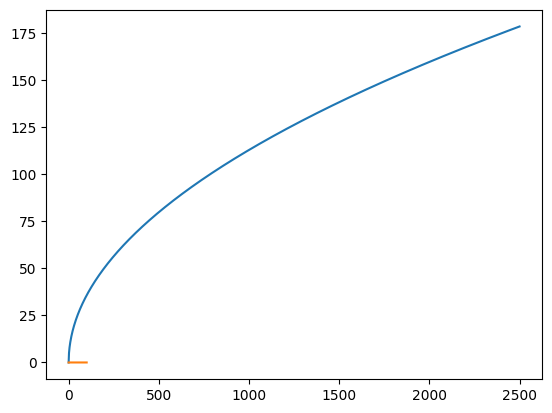

In [10]:
# https://fr.wikipedia.org/wiki/Calotte_sphérique
# hauteur calotte
p = R*(1 - cos(g))
# surface calotte
s = 2*pi*R*p
# surface hemisphere
S = 2*pi*R**2
print('p=',p,'s=',s)
print(round(s/S*100,2),'%')

hv = np.linspace(0,2500,2500)
plt.plot(hv,distance_horizon(hv)/1000)
plt.grid()
#plt.show()

hv = np.linspace(0,100,100)
plt.plot(hv,gamma_horizon(hv))
plt.grid()
#plt.show()


In [11]:
def geo(h):
    v = 2*pi*(R + h)/T
    return round(v,2)

print('période satellite = ', geo(h),'s')

def geo_h():
    #   G.M.m   =  m.v**2
    # --------     ------
    # (R+h)**2     R + h
    gh = ((G * M *T**2)/(4 * pi**2))**(1/3) - R
    return round(gh/1000,2)

def v_sat(h): # h en km
    v = sqrt((G * M)/(R + h*1000))
    return v

période satellite =  3074.66 s


In [12]:
print('altitude orbite stationnaire =',geo_h(),'km')


altitude orbite stationnaire = 35780.34 km


In [13]:
print(round(v_sat(geo_h()),2),'m/s')


3074.25 m/s
